In [ ]:
#upload data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics


In [ ]:
#supprimer les derniers lignes du data pour obtenir 59 noeuds
terrorism = pd.read_csv('sample_data/Noordin Top Terrorist Network Data.csv')
terrorism.isnull().sum()
terrorism.drop('NAME', axis = 1, inplace = True)
i=78
while(i>58):
  terrorism=terrorism.drop([i], axis = 0)
  i-=1
  print(terrorism)

In [ ]:

scaler = StandardScaler()
terrorism_scaled = scaler.fit_transform(terrorism)

In [ ]:
# choisir la méthode elbow pour obtenir le K optimale
score_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(terrorism_scaled)
    score_2.append(kmeans.inertia_)

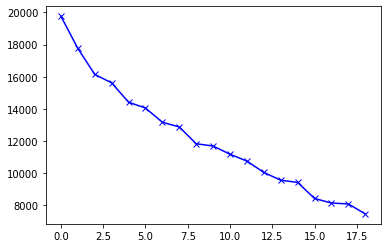

In [ ]:
#afficher la courbe
plt.plot(score_2, 'bx-')


In [ ]:
#appliquer l'algorithme kmeans et calculer les metrics
import sklearn
kmeans = KMeans(4)
kmeans.fit(terrorism)
labels = kmeans.labels_
silhouette_avg = silhouette_score(terrorism, labels)
print(silhouette_avg)
Davies_community= sklearn.metrics.davies_bouldin_score(terrorism, labels)
Calinski_Harabaz=metrics.calinski_harabasz_score(terrorism, labels)
print(Davies_community)
print(Calinski_Harabaz)

0.2396751281386504
1.374439935907428
20.58790789758856


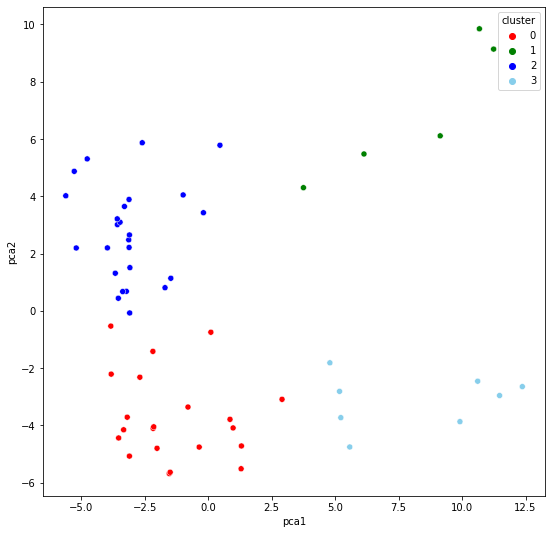

In [ ]:
#affichage du data
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(terrorism)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
plt.figure(figsize = (9,9))
#ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df[(pca_df['pca2'] < 40) & (pca_df['pca1'] < 50)], palette = ['red','green','blue','skyblue','darkviolet','orange','yellow','pink','Cyan','black','slategray','olive','palegreen','chocolate','plum'])
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df[(pca_df['pca2'] < 40) & (pca_df['pca1'] < 50)], palette = ['red','green','blue','skyblue'])